<a href="https://colab.research.google.com/github/nicolerdz/Regresion-Lineal/blob/main/DF_6_Regresi%C3%B3n_Lineal__Simple.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [995]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [996]:
df= pd.read_csv("df_limpio (1).csv", index_col = 0)
df

<ipython-input-996-b98535875b4a>:1: DtypeWarning: Columns (20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41) have mixed types. Specify dtype option on import or set low_memory=False.
  df= pd.read_csv("df_limpio (1).csv", index_col = 0)


,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,...,property_type,room_type,bathrooms_text,amenities,price,has_availability,calendar_last_scraped,first_review,last_review,instant_bookable
0.0,19.0,49.0,324.0,21.0,0.0,0.0,4.95,4.71,4.95,5.00,...,Entire loft,Entire home/apt,1.5 baths,"[""Wifi"", ""Hangers"", ""Fire extinguisher"", ""Sham...","$1,434.00",t,2023-03-30,2014-01-03,2018-06-24,f
1.0,41.0,71.0,346.0,61.0,1.0,0.0,4.85,4.90,4.88,4.93,...,Entire guest suite,Entire home/apt,1 bath,"[""Free street parking"", ""Cleaning products"", ""...",$830.00,t,2023-03-30,2014-01-01,2022-11-04,f
2.0,0.0,0.0,87.0,39.0,2.0,0.0,4.57,4.82,4.71,4.92,...,Entire rental unit,Entire home/apt,2 baths,"[""Wifi \u2013 38 Mbps"", ""Central air condition...","$1,469.00",t,2023-03-29,2012-10-31,2022-12-21,f
3.0,58.0,88.0,363.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,...,Entire villa,Entire home/apt,1 bath,"[""Wifi"", ""Washer"", ""BBQ grill"", ""Indoor firepl...","$3,658.00",t,2023-03-29,--,--,f
4.0,59.0,89.0,357.0,64.0,12.0,1.0,4.58,4.56,4.70,4.87,...,Entire home,Entire home/apt,5.5 baths,"[""Free street parking"", ""Security cameras on p...","$18,000.00",t,2023-03-30,2011-11-09,2023-03-26,f
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24219.0,47.0,77.0,352.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,...,Entire rental unit,Entire home/apt,1 bath,"[""Smoke alarm"", ""Wifi"", ""Iron"", ""Washer"", ""Sel...",$760.00,t,2023-03-30,--,--,f
24220.0,60.0,90.0,365.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,...,Entire rental unit,Entire home/apt,1 bath,"[""Lake access"", ""Ski-in/Ski-out"", ""Wifi"", ""Out...","$1,520.00",t,2023-03-29,--,--,t
24221.0,32.0,32.0,180.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,...,Private room in home,Private room,2.5 shared baths,"[""Luggage dropoff allowed"", ""Shared patio or b...",$533.00,t,2023-03-29,--,--,f
24222.0,39.0,69.0,344.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,...,Entire rental unit,Entire home/apt,1 bath,"[""Smoke alarm"", ""Free street parking"", ""Condit...","$1,200.00",t,2023-03-30,--,--,t


In [997]:
df.isnull().sum().sum()

0

In [998]:
df['room_type'].unique()

array(['Entire home/apt', 'Private room', 'Hotel room', 'Shared room',
       '--'], dtype=object)

# **ENTIRE HOME/APT**

##host_acceptance_rate vs host_response_rate

In [999]:
entire=df[df['room_type']=='Entire home/apt']

In [1000]:
dependiente= []
independiente= []
corr= []
deter=[]

In [1001]:
data= entire

In [1002]:
data.host_acceptance_rate= data.host_acceptance_rate.replace({'\%':''}, regex = True)
data.host_acceptance_rate= data.host_acceptance_rate.replace({'\,':''}, regex = True)
data.host_acceptance_rate= data.host_acceptance_rate.replace({'--':'0'}, regex = True)
data['host_acceptance_rate'] = data['host_acceptance_rate'].astype(float)

data.host_response_rate= data.host_response_rate.replace({'\%':''}, regex = True)
data.host_response_rate= data.host_response_rate.replace({'\,':''}, regex = True)
data.host_response_rate= data.host_response_rate.replace({'--':'0'}, regex = True)
data['host_response_rate'] = data['host_response_rate'].astype(float)

<ipython-input-1002-0ef7a7995669>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.host_acceptance_rate= data.host_acceptance_rate.replace({'\%':''}, regex = True)
<ipython-input-1002-0ef7a7995669>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.host_acceptance_rate= data.host_acceptance_rate.replace({'\,':''}, regex = True)
<ipython-input-1002-0ef7a7995669>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

In [1003]:
dep= data[['host_acceptance_rate']]
ind= data[['host_response_rate']]

<Axes: xlabel='host_response_rate', ylabel='host_acceptance_rate'>

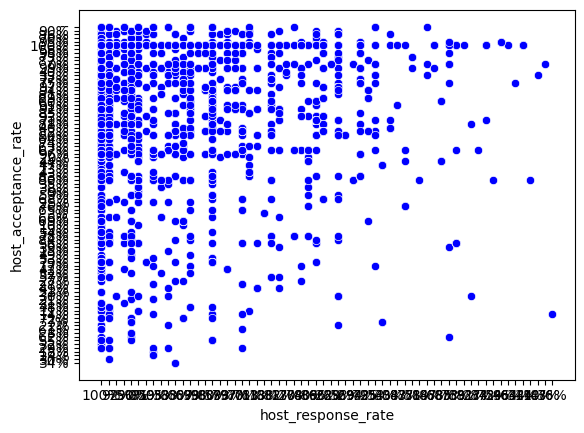

In [1004]:
#Imprimimos el scatter plot entre la variable dependiente (total) e independiente (alchool) 
#para observar el comportamiento en su dispersión 
from turtle import color


sns.scatterplot(x=ind.columns[0], y=dep.columns[0], color="blue", data=df)
#sns.scatterplot(X='speeding', y='total', color="red", data=df)

In [1005]:
Vars_Indep= ind
Var_Dep= dep

In [1006]:
#Se define model como la función de regresión lineal
from sklearn.linear_model import LinearRegression
model= LinearRegression()

In [1007]:
#Verificamos la función relacionada al modelo
type(model)

sklearn.linear_model._base.LinearRegression

In [1008]:
#Ajustamos el modelo con las variables antes declaradas
model.fit(X=Vars_Indep, y=Var_Dep)

LinearRegression()

In [1009]:
#Verificamos los coeficientes obtenidos para el modelo ajustado
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['host_response_rate'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([[0.62852689]]),
 'rank_': 1,
 'singular_': array([3993.49390386]),
 'intercept_': array([32.77244893])}

**Modelo matemático: y= 0.62852689x + 32.77244893**

---




In [1010]:
#Evaluamos la eficiencia del modelo obtenido por medio del coeficiente R Determinación
model.score(Vars_Indep,Var_Dep)

0.4797559816175937

In [1011]:
#Predecimos los valores de total de accidentes a partir de la variable "alcohol"
#y_pred= model.predict(X=df[['alcohol', 'speeding']])
y_pred= model.predict(X=ind)
y_pred

array([[95.62513821],
       [32.77244893],
       [95.62513821],
       ...,
       [32.77244893],
       [95.62513821],
       [32.77244893]])

In [1012]:
#Insertamos la columna de predicciones en el DataFrame
data['Predicciones']= y_pred
data[[dep.columns[0],ind.columns[0],'Predicciones']]


<ipython-input-1012-7e4a6d6ecb3e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Predicciones']= y_pred


,host_acceptance_rate,host_response_rate,Predicciones
0.0,0.0,100.0,95.625138
1.0,0.0,0.0,32.772449
2.0,90.0,100.0,95.625138
3.0,0.0,0.0,32.772449
4.0,86.0,100.0,95.625138
...,...,...,...
24217.0,100.0,100.0,95.625138
24219.0,100.0,100.0,95.625138
24220.0,0.0,0.0,32.772449
24222.0,100.0,100.0,95.625138


<Axes: xlabel='host_response_rate', ylabel='host_acceptance_rate'>

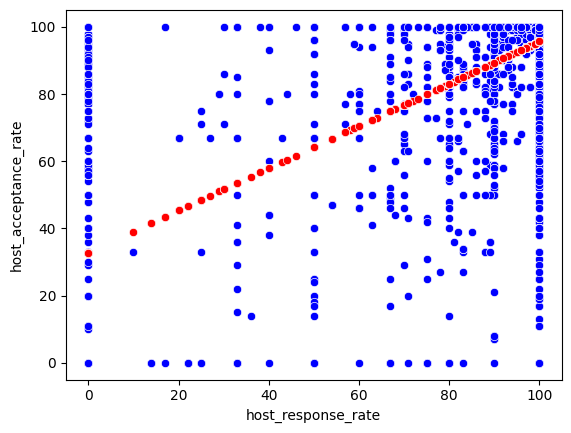

In [1013]:
#Visualizamos la gráfica comparativa entre el total real y el total predecido

sns.scatterplot(x=ind.columns[0], y=dep.columns[0], color="blue", data=data)
sns.scatterplot(x=ind.columns[0], y='Predicciones', color="red", data=data)
#sns.lineplot(x='alcohol', y='Predicciones', color="red", data=df)

In [1014]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Deter=model.score(X=Vars_Indep, y=Var_Dep)
deter.append(coef_Deter)
coef_Deter

0.4797559816175937

In [1015]:
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correl=np.sqrt(coef_Deter)
corr.append(coef_Correl)
coef_Correl

0.6926441955416891

In [1016]:
dependiente.append(dep.columns[0])
independiente.append(ind.columns[0])

## “host_acceptance_rate vs price”

In [1017]:
data= entire

In [1018]:
data.price= data.price.replace({'\$':''}, regex = True)
data.price= data.price.replace({'\,':''}, regex = True)
data.price= data.price.replace({'--':'0'}, regex = True)
data['price'] = data['price'].astype(float)

<ipython-input-1018-d16a30ad7a49>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.price= data.price.replace({'\$':''}, regex = True)
<ipython-input-1018-d16a30ad7a49>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.price= data.price.replace({'\,':''}, regex = True)
<ipython-input-1018-d16a30ad7a49>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pa

In [1019]:
dep= data[['host_acceptance_rate']]
ind= data[['price']]

<Axes: xlabel='price', ylabel='host_acceptance_rate'>

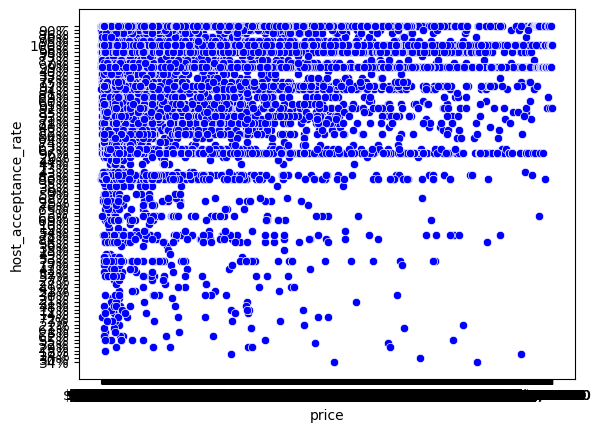

In [1020]:
#Imprimimos el scatter plot entre la variable dependiente (total) e independiente (alchool) 
#para observar el comportamiento en su dispersión 
from turtle import color


sns.scatterplot(x=ind.columns[0], y=dep.columns[0], color="blue", data=df)
#sns.scatterplot(X='speeding', y='total', color="red", data=df)

In [1021]:
Vars_Indep= ind
Var_Dep= dep

In [1022]:
#Se define model como la función de regresión lineal
from sklearn.linear_model import LinearRegression
model= LinearRegression()

In [1023]:
#Verificamos la función relacionada al modelo
type(model)

sklearn.linear_model._base.LinearRegression

In [1024]:
#Ajustamos el modelo con las variables antes declaradas
model.fit(X=Vars_Indep, y=Var_Dep)

LinearRegression()

In [1025]:
#Verificamos los coeficientes obtenidos para el modelo ajustado
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['price'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([[-4.66947697e-05]]),
 'rank_': 1,
 'singular_': array([1828454.48919382]),
 'intercept_': array([87.43659536])}

**Modelo matemático: y= 0.62852689x + 32.77244893**

---




In [1026]:
#Evaluamos la eficiencia del modelo obtenido por medio del coeficiente R Determinación
model.score(Vars_Indep,Var_Dep)

0.000555100224774896

In [1027]:
#Predecimos los valores de total de accidentes a partir de la variable "alcohol"
#y_pred= model.predict(X=df[['alcohol', 'speeding']])
y_pred= model.predict(X=ind)
y_pred

array([[87.36963506],
       [87.3978387 ],
       [87.36800074],
       ...,
       [87.36561931],
       [87.38056163],
       [87.35628035]])

In [1028]:
#Insertamos la columna de predicciones en el DataFrame
data['Predicciones']= y_pred
data[[dep.columns[0],ind.columns[0],'Predicciones']]


<ipython-input-1028-7e4a6d6ecb3e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Predicciones']= y_pred


,host_acceptance_rate,price,Predicciones
0.0,0.0,1434.0,87.369635
1.0,0.0,830.0,87.397839
2.0,90.0,1469.0,87.368001
3.0,0.0,3658.0,87.265786
4.0,86.0,18000.0,86.596090
...,...,...,...
24217.0,100.0,980.0,87.390834
24219.0,100.0,760.0,87.401107
24220.0,0.0,1520.0,87.365619
24222.0,100.0,1200.0,87.380562


<Axes: xlabel='price', ylabel='host_acceptance_rate'>

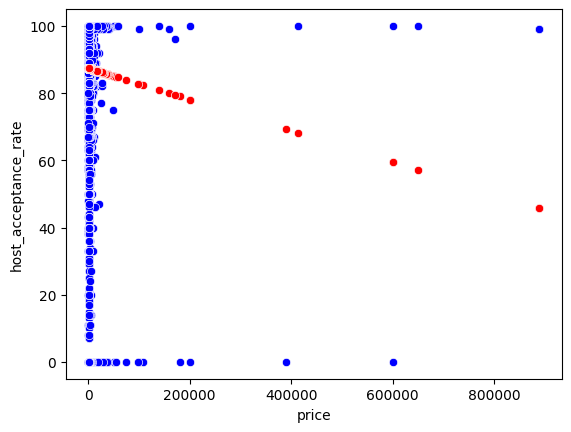

In [1029]:
#Visualizamos la gráfica comparativa entre el total real y el total predecido

sns.scatterplot(x=ind.columns[0], y=dep.columns[0], color="blue", data=data)
sns.scatterplot(x=ind.columns[0], y='Predicciones', color="red", data=data)
#sns.lineplot(x='alcohol', y='Predicciones', color="red", data=df)

In [1030]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Deter=model.score(X=Vars_Indep, y=Var_Dep)
deter.append(coef_Deter)
coef_Deter

0.000555100224774896

In [1031]:
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correl=np.sqrt(coef_Deter)
corr.append(coef_Correl)
coef_Correl

0.023560565035136486

In [1032]:
dependiente.append(dep.columns[0])
independiente.append(ind.columns[0])

## “host_acceptance_rate vs number_of_reviews ”

In [1033]:
data= entire

In [1034]:
dep= data[['host_acceptance_rate']]
ind= data[['number_of_reviews']]

<Axes: xlabel='number_of_reviews', ylabel='host_acceptance_rate'>

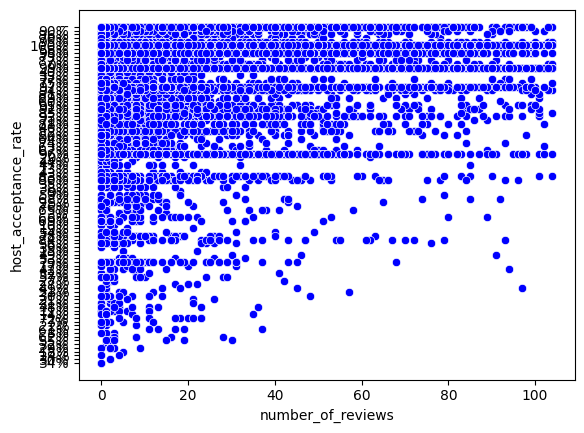

In [1035]:
#Imprimimos el scatter plot entre la variable dependiente (total) e independiente (alchool) 
#para observar el comportamiento en su dispersión 
from turtle import color


sns.scatterplot(x=ind.columns[0], y=dep.columns[0], color="blue", data=df)
#sns.scatterplot(X='speeding', y='total', color="red", data=df)

In [1036]:
Vars_Indep= ind
Var_Dep= dep

In [1037]:
#Se define model como la función de regresión lineal
from sklearn.linear_model import LinearRegression
model= LinearRegression()

In [1038]:
#Verificamos la función relacionada al modelo
type(model)

sklearn.linear_model._base.LinearRegression

In [1039]:
#Ajustamos el modelo con las variables antes declaradas
model.fit(X=Vars_Indep, y=Var_Dep)

LinearRegression()

In [1040]:
#Verificamos los coeficientes obtenidos para el modelo ajustado
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['number_of_reviews'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([[0.15211964]]),
 'rank_': 1,
 'singular_': array([3182.6088089]),
 'intercept_': array([84.17320674])}

**Modelo matemático: y= 0.15211964x + 84.17320674**

---




In [1041]:
#Evaluamos la eficiencia del modelo obtenido por medio del coeficiente R Determinación
model.score(Vars_Indep,Var_Dep)

0.017848582544274127

In [1042]:
#Predecimos los valores de total de accidentes a partir de la variable "alcohol"
#y_pred= model.predict(X=df[['alcohol', 'speeding']])
y_pred= model.predict(X=ind)
y_pred

array([[87.36771924],
       [93.45250495],
       [90.10587281],
       ...,
       [84.17320674],
       [84.17320674],
       [84.17320674]])

In [1043]:
#Insertamos la columna de predicciones en el DataFrame
data['Predicciones']= y_pred
data[[dep.columns[0],ind.columns[0],'Predicciones']]


<ipython-input-1043-7e4a6d6ecb3e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Predicciones']= y_pred


,host_acceptance_rate,number_of_reviews,Predicciones
0.0,0.0,21.0,87.367719
1.0,0.0,61.0,93.452505
2.0,90.0,39.0,90.105873
3.0,0.0,0.0,84.173207
4.0,86.0,64.0,93.908864
...,...,...,...
24217.0,100.0,0.0,84.173207
24219.0,100.0,0.0,84.173207
24220.0,0.0,0.0,84.173207
24222.0,100.0,0.0,84.173207


<Axes: xlabel='number_of_reviews', ylabel='host_acceptance_rate'>

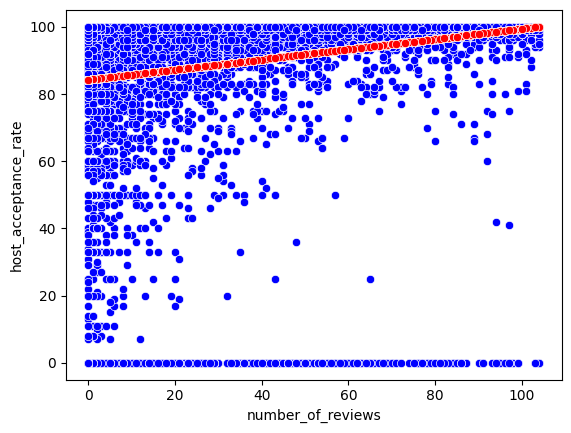

In [1044]:
#Visualizamos la gráfica comparativa entre el total real y el total predecido

sns.scatterplot(x=ind.columns[0], y=dep.columns[0], color="blue", data=data)
sns.scatterplot(x=ind.columns[0], y='Predicciones', color="red", data=data)
#sns.lineplot(x='alcohol', y='Predicciones', color="red", data=df)

In [1045]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Deter=model.score(X=Vars_Indep, y=Var_Dep)
deter.append(coef_Deter)
coef_Deter

0.017848582544274127

In [1046]:
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correl=np.sqrt(coef_Deter)
corr.append(coef_Correl)
coef_Correl

0.133598587358827

In [1047]:
dependiente.append(dep.columns[0])
independiente.append(ind.columns[0])

## “review_scores_location vs review_scores_cleanliness”

In [1048]:
data= entire

In [1049]:
dep= data[['review_scores_location']]
ind= data[['review_scores_cleanliness']]

<Axes: xlabel='review_scores_cleanliness', ylabel='review_scores_location'>

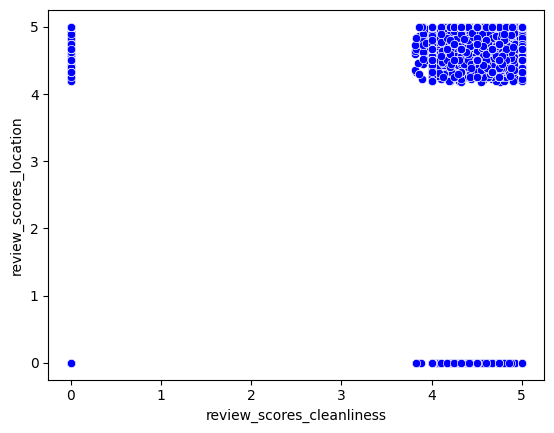

In [1050]:
#Imprimimos el scatter plot entre la variable dependiente (total) e independiente (alchool) 
#para observar el comportamiento en su dispersión 
from turtle import color


sns.scatterplot(x=ind.columns[0], y=dep.columns[0], color="blue", data=df)
#sns.scatterplot(X='speeding', y='total', color="red", data=df)

In [1051]:
Vars_Indep= ind
Var_Dep= dep

In [1052]:
#Se define model como la función de regresión lineal
from sklearn.linear_model import LinearRegression
model= LinearRegression()

In [1053]:
#Verificamos la función relacionada al modelo
type(model)

sklearn.linear_model._base.LinearRegression

In [1054]:
#Ajustamos el modelo con las variables antes declaradas
model.fit(X=Vars_Indep, y=Var_Dep)

LinearRegression()

In [1055]:
#Verificamos los coeficientes obtenidos para el modelo ajustado
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['review_scores_cleanliness'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([[0.918502]]),
 'rank_': 1,
 'singular_': array([202.42457584]),
 'intercept_': array([0.38539555])}

**Modelo matemático: y= 0.0.918502x + 0.38539555**

---




In [1056]:
#Evaluamos la eficiencia del modelo obtenido por medio del coeficiente R Determinación
model.score(Vars_Indep,Var_Dep)

0.8061059975110008

In [1057]:
#Predecimos los valores de total de accidentes a partir de la variable "alcohol"
#y_pred= model.predict(X=df[['alcohol', 'speeding']])
y_pred= model.predict(X=ind)
y_pred

array([[4.93198047],
       [4.86768533],
       [4.71153999],
       ...,
       [0.38539555],
       [0.38539555],
       [0.38539555]])

In [1058]:
#Insertamos la columna de predicciones en el DataFrame
data['Predicciones']= y_pred
data[[dep.columns[0],ind.columns[0],'Predicciones']]


<ipython-input-1058-7e4a6d6ecb3e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Predicciones']= y_pred


,review_scores_location,review_scores_cleanliness,Predicciones
0.0,5.00,4.95,4.931980
1.0,4.95,4.88,4.867685
2.0,4.58,4.71,4.711540
3.0,0.00,0.00,0.385396
4.0,4.98,4.70,4.702355
...,...,...,...
24217.0,0.00,0.00,0.385396
24219.0,0.00,0.00,0.385396
24220.0,0.00,0.00,0.385396
24222.0,0.00,0.00,0.385396


<Axes: xlabel='review_scores_cleanliness', ylabel='review_scores_location'>

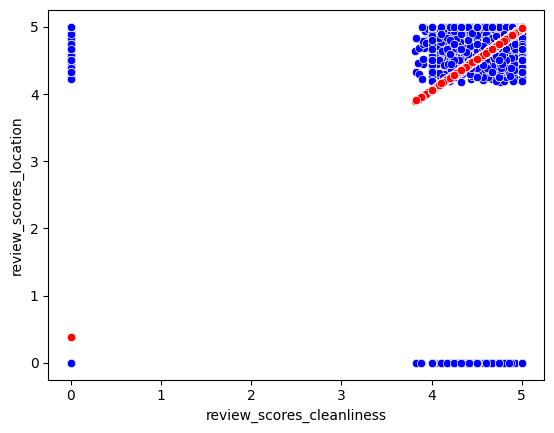

In [1059]:
#Visualizamos la gráfica comparativa entre el total real y el total predecido

sns.scatterplot(x=ind.columns[0], y=dep.columns[0], color="blue", data=data)
sns.scatterplot(x=ind.columns[0], y='Predicciones', color="red", data=data)
#sns.lineplot(x='alcohol', y='Predicciones', color="red", data=df)

In [1060]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Deter=model.score(X=Vars_Indep, y=Var_Dep)
coef_Deter

0.8061059975110008

In [1061]:
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correl=np.sqrt(coef_Deter)
coef_Correl

0.8978340590058949

In [1062]:
dependiente.append(dep.columns[0])
independiente.append(ind.columns[0])
deter.append(coef_Deter)
corr.append(coef_Correl)

## “availability_365 vs number_of_reviews”

In [1063]:
data= entire

In [1064]:
dep= data[['availability_365']]
ind= data[['number_of_reviews']]

<Axes: xlabel='number_of_reviews', ylabel='availability_365'>

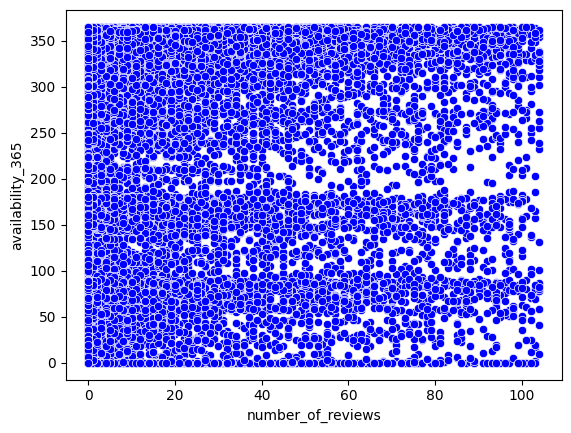

In [1065]:
#Imprimimos el scatter plot entre la variable dependiente (total) e independiente (alchool) 
#para observar el comportamiento en su dispersión 
from turtle import color


sns.scatterplot(x=ind.columns[0], y=dep.columns[0], color="blue", data=df)
#sns.scatterplot(X='speeding', y='total', color="red", data=df)

In [1066]:
Vars_Indep= ind
Var_Dep= dep

In [1067]:
#Se define model como la función de regresión lineal
from sklearn.linear_model import LinearRegression
model= LinearRegression()

In [1068]:
#Verificamos la función relacionada al modelo
type(model)

sklearn.linear_model._base.LinearRegression

In [1069]:
#Ajustamos el modelo con las variables antes declaradas
model.fit(X=Vars_Indep, y=Var_Dep)

LinearRegression()

In [1070]:
#Verificamos los coeficientes obtenidos para el modelo ajustado
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['number_of_reviews'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([[-0.25499994]]),
 'rank_': 1,
 'singular_': array([3182.6088089]),
 'intercept_': array([246.03421549])}

**Modelo matemático: y= -0.25499994x + 246.03421549**

---




In [1071]:
#Evaluamos la eficiencia del modelo obtenido por medio del coeficiente R Determinación
model.score(Vars_Indep,Var_Dep)

0.002782199352602599

In [1072]:
#Predecimos los valores de total de accidentes a partir de la variable "alcohol"
#y_pred= model.predict(X=df[['alcohol', 'speeding']])
y_pred= model.predict(X=ind)
y_pred

array([[240.67921673],
       [230.47921908],
       [236.08921779],
       ...,
       [246.03421549],
       [246.03421549],
       [246.03421549]])

In [1073]:
#Insertamos la columna de predicciones en el DataFrame
data['Predicciones']= y_pred
data[[dep.columns[0],ind.columns[0],'Predicciones']]


<ipython-input-1073-7e4a6d6ecb3e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Predicciones']= y_pred


,availability_365,number_of_reviews,Predicciones
0.0,324.0,21.0,240.679217
1.0,346.0,61.0,230.479219
2.0,87.0,39.0,236.089218
3.0,363.0,0.0,246.034215
4.0,357.0,64.0,229.714219
...,...,...,...
24217.0,342.0,0.0,246.034215
24219.0,352.0,0.0,246.034215
24220.0,365.0,0.0,246.034215
24222.0,344.0,0.0,246.034215


<Axes: xlabel='number_of_reviews', ylabel='availability_365'>

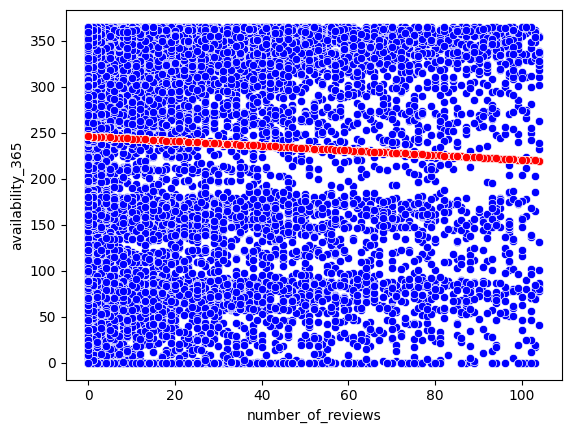

In [1074]:
#Visualizamos la gráfica comparativa entre el total real y el total predecido

sns.scatterplot(x=ind.columns[0], y=dep.columns[0], color="blue", data=data)
sns.scatterplot(x=ind.columns[0], y='Predicciones', color="red", data=data)
#sns.lineplot(x='alcohol', y='Predicciones', color="red", data=df)

In [1075]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Deter=model.score(X=Vars_Indep, y=Var_Dep)
coef_Deter

0.002782199352602599

In [1076]:
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correl=np.sqrt(coef_Deter)
coef_Correl

0.052746557732259634

In [1077]:
dependiente.append(dep.columns[0])
independiente.append(ind.columns[0])
deter.append(coef_Deter)
corr.append(coef_Correl)

## “reviews_per_month vs review_scores_communication”

In [1078]:
data= entire

In [1079]:
dep= data[['reviews_per_month']]
ind= data[['review_scores_communication']]

<Axes: xlabel='review_scores_communication', ylabel='reviews_per_month'>

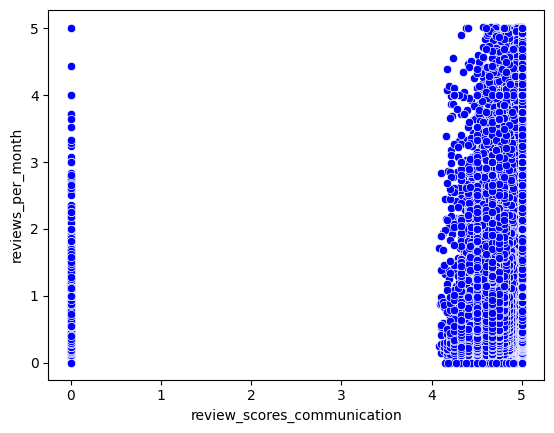

In [1080]:
#Imprimimos el scatter plot entre la variable dependiente (total) e independiente (alchool) 
#para observar el comportamiento en su dispersión 
from turtle import color


sns.scatterplot(x=ind.columns[0], y=dep.columns[0], color="blue", data=df)
#sns.scatterplot(X='speeding', y='total', color="red", data=df)

In [1081]:
Vars_Indep= ind
Var_Dep= dep

In [1082]:
#Se define model como la función de regresión lineal
from sklearn.linear_model import LinearRegression
model= LinearRegression()

In [1083]:
#Verificamos la función relacionada al modelo
type(model)

sklearn.linear_model._base.LinearRegression

In [1084]:
#Ajustamos el modelo con las variables antes declaradas
model.fit(X=Vars_Indep, y=Var_Dep)

LinearRegression()

In [1085]:
#Verificamos los coeficientes obtenidos para el modelo ajustado
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['review_scores_communication'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([[0.28910344]]),
 'rank_': 1,
 'singular_': array([209.24345598]),
 'intercept_': array([0.16789008])}

**Modelo matemático: y= 0.28910344x + 0.16789008**

---




In [1086]:
#Evaluamos la eficiencia del modelo obtenido por medio del coeficiente R Determinación
model.score(Vars_Indep,Var_Dep)

0.1409890826724347

In [1087]:
#Predecimos los valores de total de accidentes a partir de la variable "alcohol"
#y_pred= model.predict(X=df[['alcohol', 'speeding']])
y_pred= model.predict(X=ind)
y_pred

array([[1.59895212],
       [1.61340729],
       [1.59027901],
       ...,
       [0.16789008],
       [0.16789008],
       [0.16789008]])

In [1088]:
#Insertamos la columna de predicciones en el DataFrame
data['Predicciones']= y_pred
data[[dep.columns[0],ind.columns[0],'Predicciones']]


<ipython-input-1088-7e4a6d6ecb3e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Predicciones']= y_pred


,reviews_per_month,review_scores_communication,Predicciones
0.0,0.19,4.95,1.598952
1.0,0.54,5.00,1.613407
2.0,0.31,4.92,1.590279
3.0,0.00,0.00,0.167890
4.0,0.46,4.78,1.549805
...,...,...,...
24217.0,0.00,0.00,0.167890
24219.0,0.00,0.00,0.167890
24220.0,0.00,0.00,0.167890
24222.0,0.00,0.00,0.167890


<Axes: xlabel='review_scores_communication', ylabel='reviews_per_month'>

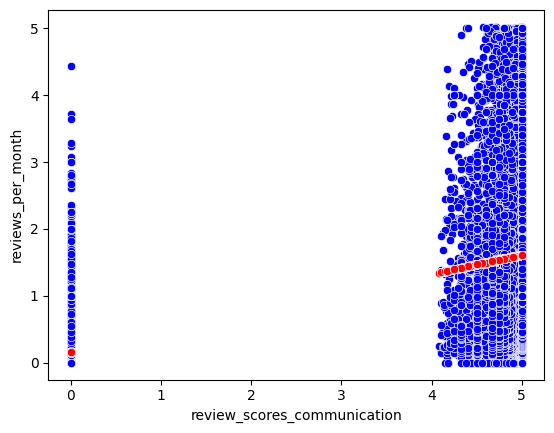

In [1089]:
#Visualizamos la gráfica comparativa entre el total real y el total predecido

sns.scatterplot(x=ind.columns[0], y=dep.columns[0], color="blue", data=data)
sns.scatterplot(x=ind.columns[0], y='Predicciones', color="red", data=data)
#sns.lineplot(x='alcohol', y='Predicciones', color="red", data=df)

In [1090]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Deter=model.score(X=Vars_Indep, y=Var_Dep)
coef_Deter

0.1409890826724347

In [1091]:
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correl=np.sqrt(coef_Deter)
coef_Correl

0.3754851297620649

In [1092]:
dependiente.append(dep.columns[0])
independiente.append(ind.columns[0])
deter.append(coef_Deter)
corr.append(coef_Correl)

# **HOTEL ROOM**

##host_acceptance_rate vs host_response_rate

In [1093]:
hotel=df[df['room_type']=='Hotel room']

In [1094]:
data= hotel

In [1095]:
data.host_acceptance_rate= data.host_acceptance_rate.replace({'\%':''}, regex = True)
data.host_acceptance_rate= data.host_acceptance_rate.replace({'\,':''}, regex = True)
data.host_acceptance_rate= data.host_acceptance_rate.replace({'--':'0'}, regex = True)
data['host_acceptance_rate'] = data['host_acceptance_rate'].astype(float)

data.host_response_rate= data.host_response_rate.replace({'\%':''}, regex = True)
data.host_response_rate= data.host_response_rate.replace({'\,':''}, regex = True)
data.host_response_rate= data.host_response_rate.replace({'--':'0'}, regex = True)
data['host_response_rate'] = data['host_response_rate'].astype(float)

<ipython-input-1095-0ef7a7995669>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.host_acceptance_rate= data.host_acceptance_rate.replace({'\%':''}, regex = True)
<ipython-input-1095-0ef7a7995669>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.host_acceptance_rate= data.host_acceptance_rate.replace({'\,':''}, regex = True)
<ipython-input-1095-0ef7a7995669>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

In [1096]:
dep= data[['host_acceptance_rate']]
ind= data[['host_response_rate']]

<Axes: xlabel='host_response_rate', ylabel='host_acceptance_rate'>

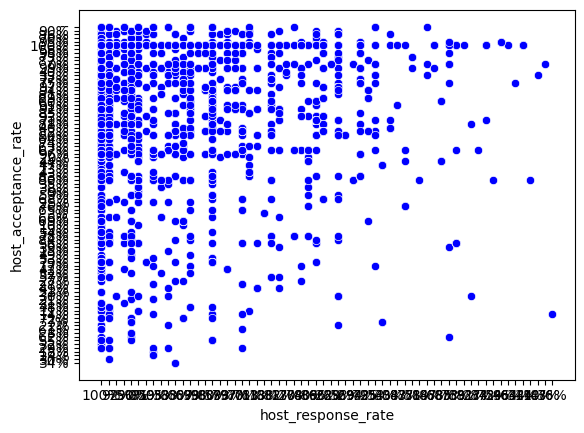

In [1097]:
#Imprimimos el scatter plot entre la variable dependiente (total) e independiente (alchool) 
#para observar el comportamiento en su dispersión 
from turtle import color


sns.scatterplot(x=ind.columns[0], y=dep.columns[0], color="blue", data=df)
#sns.scatterplot(X='speeding', y='total', color="red", data=df)

In [1098]:
Vars_Indep= ind
Var_Dep= dep

In [1099]:
#Se define model como la función de regresión lineal
from sklearn.linear_model import LinearRegression
model= LinearRegression()

In [1100]:
#Verificamos la función relacionada al modelo
type(model)

sklearn.linear_model._base.LinearRegression

In [1101]:
#Ajustamos el modelo con las variables antes declaradas
model.fit(X=Vars_Indep, y=Var_Dep)

LinearRegression()

In [1102]:
#Verificamos los coeficientes obtenidos para el modelo ajustado
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['host_response_rate'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([[0.67835143]]),
 'rank_': 1,
 'singular_': array([309.08849993]),
 'intercept_': array([26.81271115])}

**Modelo matemático: y= 0.62852689x + 32.77244893**

---




In [1103]:
#Evaluamos la eficiencia del modelo obtenido por medio del coeficiente R Determinación
model.score(Vars_Indep,Var_Dep)

0.5817840176666689

In [1104]:
#Predecimos los valores de total de accidentes a partir de la variable "alcohol"
#y_pred= model.predict(X=df[['alcohol', 'speeding']])
y_pred= model.predict(X=ind)
y_pred

array([[87.86434011],
       [87.86434011],
       [87.86434011],
       [87.86434011],
       [94.64785444],
       [94.64785444],
       [94.64785444],
       [94.64785444],
       [93.96950301],
       [91.25609728],
       [93.29115158],
       [91.25609728],
       [91.25609728],
       [94.64785444],
       [94.64785444],
       [94.64785444],
       [94.64785444],
       [94.64785444],
       [74.97566289],
       [88.54269155],
       [91.25609728],
       [26.81271115],
       [94.64785444],
       [26.81271115],
       [94.64785444],
       [94.64785444],
       [94.64785444],
       [94.64785444],
       [94.64785444],
       [94.64785444],
       [94.64785444],
       [94.64785444],
       [94.64785444],
       [94.64785444],
       [94.64785444],
       [94.64785444],
       [74.97566289],
       [94.64785444],
       [94.64785444],
       [93.29115158],
       [93.29115158],
       [93.96950301],
       [94.64785444],
       [94.64785444],
       [94.64785444],
       [94

In [1105]:
#Insertamos la columna de predicciones en el DataFrame
data['Predicciones']= y_pred
data[[dep.columns[0],ind.columns[0],'Predicciones']]


<ipython-input-1105-7e4a6d6ecb3e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Predicciones']= y_pred


,host_acceptance_rate,host_response_rate,Predicciones
14.0,87.0,90.0,87.864340
53.0,87.0,90.0,87.864340
55.0,87.0,90.0,87.864340
62.0,87.0,90.0,87.864340
66.0,86.0,100.0,94.647854
...,...,...,...
9495.0,100.0,100.0,94.647854
9537.0,0.0,0.0,26.812711
9539.0,100.0,0.0,26.812711
9544.0,0.0,0.0,26.812711


<Axes: xlabel='host_response_rate', ylabel='host_acceptance_rate'>

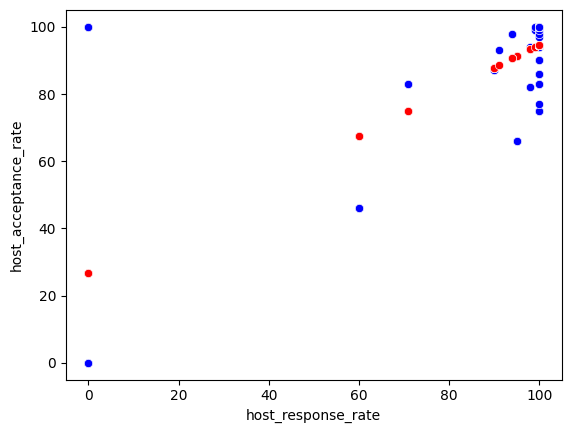

In [1106]:
#Visualizamos la gráfica comparativa entre el total real y el total predecido

sns.scatterplot(x=ind.columns[0], y=dep.columns[0], color="blue", data=data)
sns.scatterplot(x=ind.columns[0], y='Predicciones', color="red", data=data)
#sns.lineplot(x='alcohol', y='Predicciones', color="red", data=df)

In [1107]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Deter=model.score(X=Vars_Indep, y=Var_Dep)
deter.append(coef_Deter)
coef_Deter

0.5817840176666689

In [1108]:
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correl=np.sqrt(coef_Deter)
corr.append(coef_Correl)
coef_Correl

0.7627476762774625

In [1109]:
dependiente.append(dep.columns[0])
independiente.append(ind.columns[0])

## “host_acceptance_rate vs price”

In [1110]:
data= hotel

In [1111]:
data.price= data.price.replace({'\$':''}, regex = True)
data.price= data.price.replace({'\,':''}, regex = True)
data.price= data.price.replace({'--':'0'}, regex = True)
data['price'] = data['price'].astype(float)

<ipython-input-1111-d16a30ad7a49>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.price= data.price.replace({'\$':''}, regex = True)
<ipython-input-1111-d16a30ad7a49>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.price= data.price.replace({'\,':''}, regex = True)
<ipython-input-1111-d16a30ad7a49>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pa

In [1112]:
dep= data[['host_acceptance_rate']]
ind= data[['price']]

<Axes: xlabel='price', ylabel='host_acceptance_rate'>

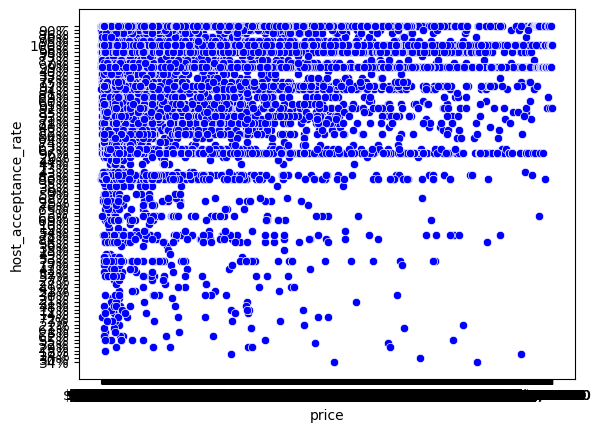

In [1113]:
#Imprimimos el scatter plot entre la variable dependiente (total) e independiente (alchool) 
#para observar el comportamiento en su dispersión 
from turtle import color


sns.scatterplot(x=ind.columns[0], y=dep.columns[0], color="blue", data=df)
#sns.scatterplot(X='speeding', y='total', color="red", data=df)

In [1114]:
Vars_Indep= ind
Var_Dep= dep

In [1115]:
#Se define model como la función de regresión lineal
from sklearn.linear_model import LinearRegression
model= LinearRegression()

In [1116]:
#Verificamos la función relacionada al modelo
type(model)

sklearn.linear_model._base.LinearRegression

In [1117]:
#Ajustamos el modelo con las variables antes declaradas
model.fit(X=Vars_Indep, y=Var_Dep)

LinearRegression()

In [1118]:
#Verificamos los coeficientes obtenidos para el modelo ajustado
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['price'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([[-0.00147291]]),
 'rank_': 1,
 'singular_': array([65531.08068275]),
 'intercept_': array([91.12905846])}

**Modelo matemático: y= 0.62852689x + 32.77244893**

---




In [1119]:
#Evaluamos la eficiencia del modelo obtenido por medio del coeficiente R Determinación
model.score(Vars_Indep,Var_Dep)

0.12329092094701422

In [1120]:
#Predecimos los valores de total de accidentes a partir de la variable "alcohol"
#y_pred= model.predict(X=df[['alcohol', 'speeding']])
y_pred= model.predict(X=ind)
y_pred

array([[89.64731541],
       [89.64731541],
       [89.79166016],
       [89.79166016],
       [86.4717309 ],
       [86.99313949],
       [86.85763217],
       [88.47782835],
       [89.79166016],
       [76.98621872],
       [89.7224336 ],
       [76.21588908],
       [78.42966623],
       [87.74137554],
       [87.59408498],
       [87.59408498],
       [84.39051526],
       [90.46035931],
       [88.18472013],
       [90.02585216],
       [75.75339672],
       [-2.4593645 ],
       [88.91970004],
       [76.40000228],
       [88.99481822],
       [88.19797628],
       [88.19797628],
       [88.19797628],
       [88.19797628],
       [88.19797628],
       [88.03595667],
       [90.02437925],
       [89.84615767],
       [90.00670438],
       [89.65615284],
       [89.97577336],
       [88.18472013],
       [88.33053779],
       [88.33053779],
       [89.4087047 ],
       [85.53643583],
       [88.9373749 ],
       [90.52516716],
       [90.46625093],
       [89.78282273],
       [90

In [1121]:
#Insertamos la columna de predicciones en el DataFrame
data['Predicciones']= y_pred
data[[dep.columns[0],ind.columns[0],'Predicciones']]


<ipython-input-1121-7e4a6d6ecb3e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Predicciones']= y_pred


,host_acceptance_rate,price,Predicciones
14.0,87.0,1006.0,89.647315
53.0,87.0,1006.0,89.647315
55.0,87.0,908.0,89.791660
62.0,87.0,908.0,89.791660
66.0,86.0,3162.0,86.471731
...,...,...,...
9495.0,100.0,0.0,91.129058
9537.0,0.0,0.0,91.129058
9539.0,100.0,0.0,91.129058
9544.0,0.0,0.0,91.129058


<Axes: xlabel='price', ylabel='host_acceptance_rate'>

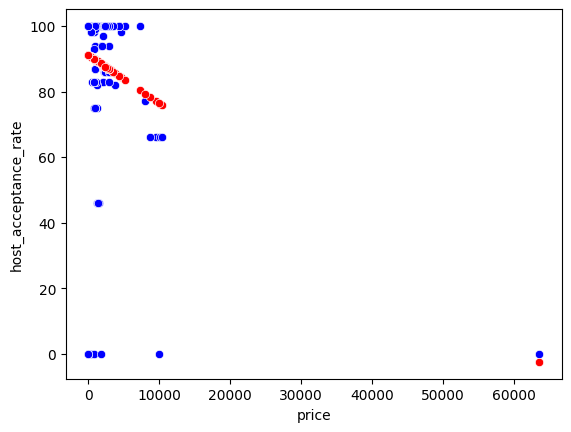

In [1122]:
#Visualizamos la gráfica comparativa entre el total real y el total predecido

sns.scatterplot(x=ind.columns[0], y=dep.columns[0], color="blue", data=data)
sns.scatterplot(x=ind.columns[0], y='Predicciones', color="red", data=data)
#sns.lineplot(x='alcohol', y='Predicciones', color="red", data=df)

In [1123]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Deter=model.score(X=Vars_Indep, y=Var_Dep)
deter.append(coef_Deter)
coef_Deter

0.12329092094701422

In [1124]:
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correl=np.sqrt(coef_Deter)
corr.append(coef_Correl)
coef_Correl

0.351128069152858

In [1125]:
dependiente.append(dep.columns[0])
independiente.append(ind.columns[0])

## “host_acceptance_rate vs number_of_reviews ”

In [1126]:
data= hotel

In [1127]:
dep= data[['host_acceptance_rate']]
ind= data[['number_of_reviews']]

<Axes: xlabel='number_of_reviews', ylabel='host_acceptance_rate'>

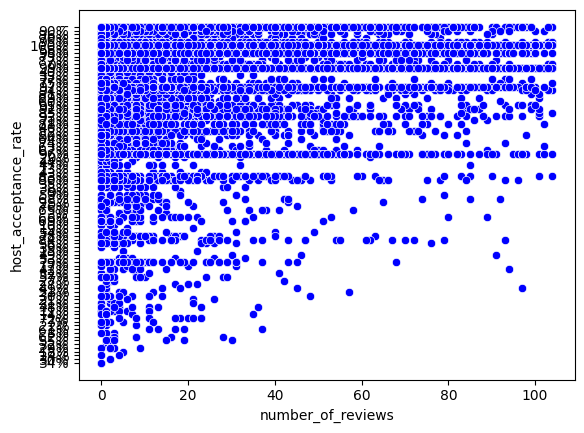

In [1128]:
#Imprimimos el scatter plot entre la variable dependiente (total) e independiente (alchool) 
#para observar el comportamiento en su dispersión 
from turtle import color


sns.scatterplot(x=ind.columns[0], y=dep.columns[0], color="blue", data=df)
#sns.scatterplot(X='speeding', y='total', color="red", data=df)

In [1129]:
Vars_Indep= ind
Var_Dep= dep

In [1130]:
#Se define model como la función de regresión lineal
from sklearn.linear_model import LinearRegression
model= LinearRegression()

In [1131]:
#Verificamos la función relacionada al modelo
type(model)

sklearn.linear_model._base.LinearRegression

In [1132]:
#Ajustamos el modelo con las variables antes declaradas
model.fit(X=Vars_Indep, y=Var_Dep)

LinearRegression()

In [1133]:
#Verificamos los coeficientes obtenidos para el modelo ajustado
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['number_of_reviews'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([[0.24072323]]),
 'rank_': 1,
 'singular_': array([240.56891232]),
 'intercept_': array([84.21750408])}

**Modelo matemático: y= 0.15211964x + 84.17320674**

---




In [1134]:
#Evaluamos la eficiencia del modelo obtenido por medio del coeficiente R Determinación
model.score(Vars_Indep,Var_Dep)

0.04438146464403403

In [1135]:
#Predecimos los valores de total de accidentes a partir de la variable "alcohol"
#y_pred= model.predict(X=df[['alcohol', 'speeding']])
y_pred= model.predict(X=ind)
y_pred

array([[ 89.75413848],
       [ 91.67992436],
       [ 96.01294259],
       [ 89.51341524],
       [ 85.90256672],
       [ 84.45822731],
       [ 90.23558495],
       [ 94.80932641],
       [ 85.18039702],
       [ 85.90256672],
       [ 93.12426377],
       [ 84.21750408],
       [ 84.69895055],
       [ 86.14328996],
       [ 84.93967378],
       [ 84.45822731],
       [ 94.32787994],
       [109.25272051],
       [ 89.75413848],
       [ 90.95775465],
       [ 84.21750408],
       [ 86.86545966],
       [ 84.21750408],
       [ 84.45822731],
       [105.64187198],
       [ 86.38401319],
       [ 87.34690613],
       [ 87.1061829 ],
       [ 88.06907584],
       [ 87.58762937],
       [ 84.45822731],
       [ 87.34690613],
       [ 84.21750408],
       [ 84.21750408],
       [ 94.80932641],
       [ 94.80932641],
       [ 85.18039702],
       [ 84.21750408],
       [ 84.21750408],
       [ 86.62473643],
       [ 86.62473643],
       [ 84.21750408],
       [ 84.21750408],
       [ 92

In [1136]:
#Insertamos la columna de predicciones en el DataFrame
data['Predicciones']= y_pred
data[[dep.columns[0],ind.columns[0],'Predicciones']]


<ipython-input-1136-7e4a6d6ecb3e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Predicciones']= y_pred


,host_acceptance_rate,number_of_reviews,Predicciones
14.0,87.0,23.0,89.754138
53.0,87.0,31.0,91.679924
55.0,87.0,49.0,96.012943
62.0,87.0,22.0,89.513415
66.0,86.0,7.0,85.902567
...,...,...,...
9495.0,100.0,3.0,84.939674
9537.0,0.0,0.0,84.217504
9539.0,100.0,0.0,84.217504
9544.0,0.0,0.0,84.217504


<Axes: xlabel='number_of_reviews', ylabel='host_acceptance_rate'>

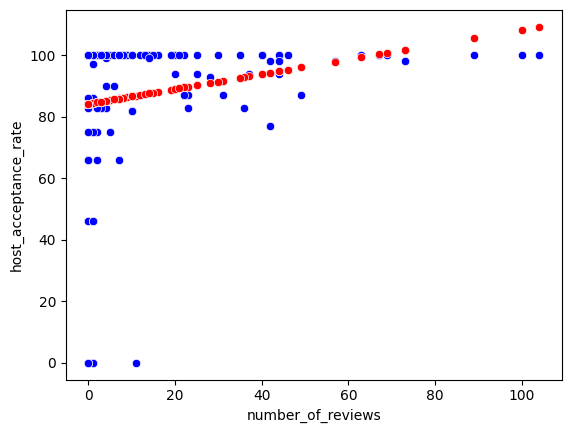

In [1137]:
#Visualizamos la gráfica comparativa entre el total real y el total predecido

sns.scatterplot(x=ind.columns[0], y=dep.columns[0], color="blue", data=data)
sns.scatterplot(x=ind.columns[0], y='Predicciones', color="red", data=data)
#sns.lineplot(x='alcohol', y='Predicciones', color="red", data=df)

In [1138]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Deter=model.score(X=Vars_Indep, y=Var_Dep)
deter.append(coef_Deter)
coef_Deter

0.04438146464403403

In [1139]:
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correl=np.sqrt(coef_Deter)
corr.append(coef_Correl)
coef_Correl

0.21066908801253692

In [1140]:
dependiente.append(dep.columns[0])
independiente.append(ind.columns[0])

## “review_scores_location vs review_scores_cleanliness”

In [1141]:
data= hotel

In [1142]:
dep= data[['review_scores_location']]
ind= data[['review_scores_cleanliness']]

<Axes: xlabel='review_scores_cleanliness', ylabel='review_scores_location'>

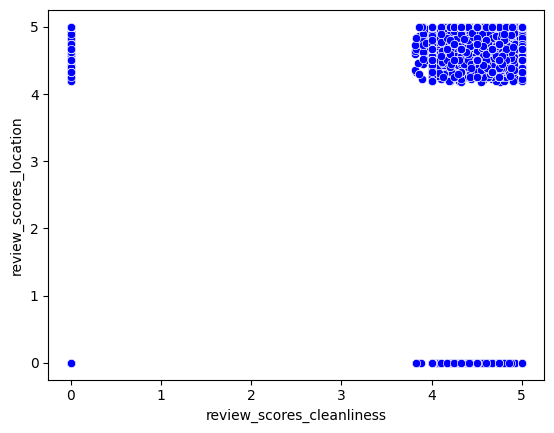

In [1143]:
#Imprimimos el scatter plot entre la variable dependiente (total) e independiente (alchool) 
#para observar el comportamiento en su dispersión 
from turtle import color


sns.scatterplot(x=ind.columns[0], y=dep.columns[0], color="blue", data=df)
#sns.scatterplot(X='speeding', y='total', color="red", data=df)

In [1144]:
Vars_Indep= ind
Var_Dep= dep

In [1145]:
#Se define model como la función de regresión lineal
from sklearn.linear_model import LinearRegression
model= LinearRegression()

In [1146]:
#Verificamos la función relacionada al modelo
type(model)

sklearn.linear_model._base.LinearRegression

In [1147]:
#Ajustamos el modelo con las variables antes declaradas
model.fit(X=Vars_Indep, y=Var_Dep)

LinearRegression()

In [1148]:
#Verificamos los coeficientes obtenidos para el modelo ajustado
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['review_scores_cleanliness'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([[0.98782912]]),
 'rank_': 1,
 'singular_': array([22.56305872]),
 'intercept_': array([-0.02355712])}

**Modelo matemático: y= 0.0.918502x + 0.38539555**

---




In [1149]:
#Evaluamos la eficiencia del modelo obtenido por medio del coeficiente R Determinación
model.score(Vars_Indep,Var_Dep)

0.8586913252278282

In [1150]:
#Predecimos los valores de total de accidentes a partir de la variable "alcohol"
#y_pred= model.predict(X=df[['alcohol', 'speeding']])
y_pred= model.predict(X=ind)
y_pred

array([[ 4.74765754],
       [ 4.85631874],
       [ 4.83656216],
       [ 4.86619704],
       [ 4.91558849],
       [ 4.91558849],
       [ 4.91558849],
       [ 4.86619704],
       [ 4.91558849],
       [ 3.78946329],
       [ 4.83656216],
       [-0.02355712],
       [ 4.91558849],
       [ 4.91558849],
       [ 4.91558849],
       [ 4.91558849],
       [ 4.81680558],
       [ 4.82668387],
       [ 4.61923976],
       [ 4.66863121],
       [-0.02355712],
       [ 4.82668387],
       [ 4.70814438],
       [ 4.91558849],
       [ 4.6785095 ],
       [ 4.80692729],
       [ 4.91558849],
       [ 4.50070026],
       [ 4.60936146],
       [ 4.70814438],
       [ 4.91558849],
       [ 4.60936146],
       [ 4.72790096],
       [ 4.81680558],
       [ 4.71802267],
       [ 4.75753583],
       [-0.02355712],
       [-0.02355712],
       [-0.02355712],
       [ 4.91558849],
       [ 4.71802267],
       [ 4.89583191],
       [ 4.797049  ],
       [ 4.48094368],
       [ 4.52045684],
       [ 3

In [1151]:
#Insertamos la columna de predicciones en el DataFrame
data['Predicciones']= y_pred
data[[dep.columns[0],ind.columns[0],'Predicciones']]


<ipython-input-1151-7e4a6d6ecb3e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Predicciones']= y_pred


,review_scores_location,review_scores_cleanliness,Predicciones
14.0,4.83,4.83,4.747658
53.0,4.97,4.94,4.856319
55.0,5.00,4.92,4.836562
62.0,4.95,4.95,4.866197
66.0,5.00,5.00,4.915588
...,...,...,...
9495.0,5.00,5.00,4.915588
9537.0,0.00,0.00,-0.023557
9539.0,0.00,0.00,-0.023557
9544.0,0.00,0.00,-0.023557


<Axes: xlabel='review_scores_cleanliness', ylabel='review_scores_location'>

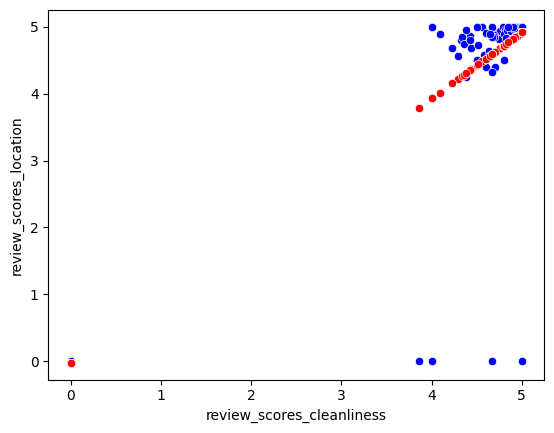

In [1152]:
#Visualizamos la gráfica comparativa entre el total real y el total predecido

sns.scatterplot(x=ind.columns[0], y=dep.columns[0], color="blue", data=data)
sns.scatterplot(x=ind.columns[0], y='Predicciones', color="red", data=data)
#sns.lineplot(x='alcohol', y='Predicciones', color="red", data=df)

In [1153]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Deter=model.score(X=Vars_Indep, y=Var_Dep)
deter.append(coef_Deter)
coef_Deter

0.8586913252278282

In [1154]:
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correl=np.sqrt(coef_Deter)
corr.append(coef_Correl)
coef_Correl

0.9266559907688657

In [1155]:
dependiente.append(dep.columns[0])
independiente.append(ind.columns[0])

## “availability_365 vs number_of_reviews”

In [1156]:
data= hotel

In [1157]:
dep= data[['availability_365']]
ind= data[['number_of_reviews']]

<Axes: xlabel='number_of_reviews', ylabel='availability_365'>

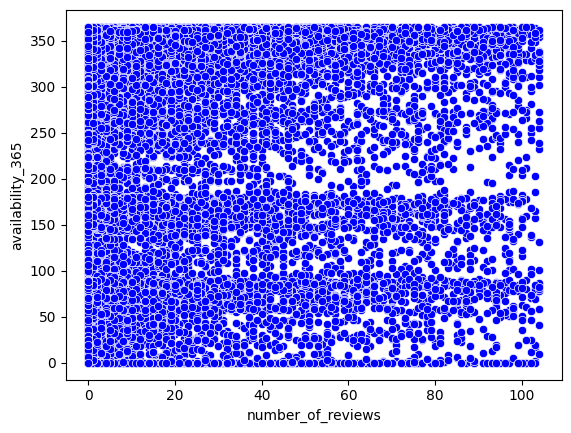

In [1158]:
#Imprimimos el scatter plot entre la variable dependiente (total) e independiente (alchool) 
#para observar el comportamiento en su dispersión 
from turtle import color


sns.scatterplot(x=ind.columns[0], y=dep.columns[0], color="blue", data=df)
#sns.scatterplot(X='speeding', y='total', color="red", data=df)

In [1159]:
Vars_Indep= ind
Var_Dep= dep

In [1160]:
#Se define model como la función de regresión lineal
from sklearn.linear_model import LinearRegression
model= LinearRegression()

In [1161]:
#Verificamos la función relacionada al modelo
type(model)

sklearn.linear_model._base.LinearRegression

In [1162]:
#Ajustamos el modelo con las variables antes declaradas
model.fit(X=Vars_Indep, y=Var_Dep)

LinearRegression()

In [1163]:
#Verificamos los coeficientes obtenidos para el modelo ajustado
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['number_of_reviews'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([[0.46588358]]),
 'rank_': 1,
 'singular_': array([240.56891232]),
 'intercept_': array([240.08105773])}

**Modelo matemático: y= -0.25499994x + 246.03421549**

---




In [1164]:
#Evaluamos la eficiencia del modelo obtenido por medio del coeficiente R Determinación
model.score(Vars_Indep,Var_Dep)

0.007228008571689815

In [1165]:
#Predecimos los valores de total de accidentes a partir de la variable "alcohol"
#y_pred= model.predict(X=df[['alcohol', 'speeding']])
y_pred= model.predict(X=ind)
y_pred

array([[250.79638015],
       [254.52344882],
       [262.90935332],
       [250.33049657],
       [243.34224282],
       [240.54694131],
       [251.72814732],
       [260.57993541],
       [241.94459207],
       [243.34224282],
       [257.31875032],
       [240.08105773],
       [241.0128249 ],
       [243.8081264 ],
       [241.47870848],
       [240.54694131],
       [259.64816824],
       [288.53295042],
       [250.79638015],
       [253.12579807],
       [240.08105773],
       [245.20577715],
       [240.08105773],
       [240.54694131],
       [281.54469666],
       [244.27400998],
       [246.13754432],
       [245.67166073],
       [247.53519507],
       [246.6034279 ],
       [240.54694131],
       [246.13754432],
       [240.08105773],
       [240.08105773],
       [260.57993541],
       [260.57993541],
       [241.94459207],
       [240.08105773],
       [240.08105773],
       [244.73989357],
       [244.73989357],
       [240.08105773],
       [240.08105773],
       [256

In [1166]:
#Insertamos la columna de predicciones en el DataFrame
data['Predicciones']= y_pred
data[[dep.columns[0],ind.columns[0],'Predicciones']]


<ipython-input-1166-7e4a6d6ecb3e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Predicciones']= y_pred


,availability_365,number_of_reviews,Predicciones
14.0,340.0,23.0,250.796380
53.0,332.0,31.0,254.523449
55.0,350.0,49.0,262.909353
62.0,356.0,22.0,250.330497
66.0,287.0,7.0,243.342243
...,...,...,...
9495.0,0.0,3.0,241.478708
9537.0,0.0,0.0,240.081058
9539.0,0.0,0.0,240.081058
9544.0,0.0,0.0,240.081058


<Axes: xlabel='number_of_reviews', ylabel='availability_365'>

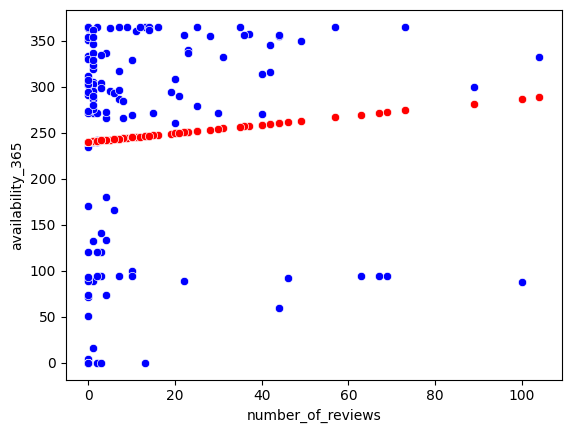

In [1167]:
#Visualizamos la gráfica comparativa entre el total real y el total predecido

sns.scatterplot(x=ind.columns[0], y=dep.columns[0], color="blue", data=data)
sns.scatterplot(x=ind.columns[0], y='Predicciones', color="red", data=data)
#sns.lineplot(x='alcohol', y='Predicciones', color="red", data=df)

In [1168]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Deter=model.score(X=Vars_Indep, y=Var_Dep)
deter.append(coef_Deter)
coef_Deter

0.007228008571689815

In [1169]:
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correl=np.sqrt(coef_Deter)
corr.append(coef_Correl)
coef_Correl

0.08501769563855406

In [1170]:
dependiente.append(dep.columns[0])
independiente.append(ind.columns[0])

## “reviews_per_month vs review_scores_communication”

In [1171]:
data= hotel

In [1172]:
dep= data[['reviews_per_month']]
ind= data[['review_scores_communication']]

<Axes: xlabel='review_scores_communication', ylabel='reviews_per_month'>

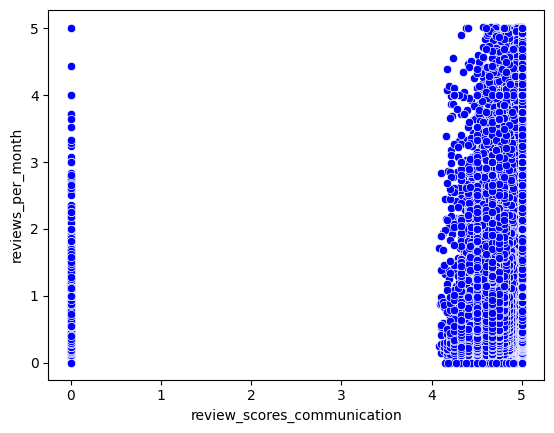

In [1173]:
#Imprimimos el scatter plot entre la variable dependiente (total) e independiente (alchool) 
#para observar el comportamiento en su dispersión 
from turtle import color


sns.scatterplot(x=ind.columns[0], y=dep.columns[0], color="blue", data=df)
#sns.scatterplot(X='speeding', y='total', color="red", data=df)

In [1174]:
Vars_Indep= ind
Var_Dep= dep

In [1175]:
#Se define model como la función de regresión lineal
from sklearn.linear_model import LinearRegression
model= LinearRegression()

In [1176]:
#Verificamos la función relacionada al modelo
type(model)

sklearn.linear_model._base.LinearRegression

In [1177]:
#Ajustamos el modelo con las variables antes declaradas
model.fit(X=Vars_Indep, y=Var_Dep)

LinearRegression()

In [1178]:
#Verificamos los coeficientes obtenidos para el modelo ajustado
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['review_scores_communication'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([[0.10613471]]),
 'rank_': 1,
 'singular_': array([24.308924]),
 'intercept_': array([0.03240409])}

**Modelo matemático: y= 0.28910344x + 0.16789008**

---




In [1179]:
#Evaluamos la eficiencia del modelo obtenido por medio del coeficiente R Determinación
model.score(Vars_Indep,Var_Dep)

0.09843059146391353

In [1180]:
#Predecimos los valores de total de accidentes a partir de la variable "alcohol"
#y_pred= model.predict(X=df[['alcohol', 'speeding']])
y_pred= model.predict(X=ind)
y_pred

array([[0.56307764],
       [0.56307764],
       [0.56307764],
       [0.56307764],
       [0.56307764],
       [0.03240409],
       [0.55883225],
       [0.55352552],
       [0.56307764],
       [0.03240409],
       [0.539728  ],
       [0.03240409],
       [0.56307764],
       [0.55034148],
       [0.56307764],
       [0.56307764],
       [0.55034148],
       [0.55564821],
       [0.53123723],
       [0.53229857],
       [0.03240409],
       [0.56307764],
       [0.54715743],
       [0.56307764],
       [0.53335992],
       [0.51637837],
       [0.56307764],
       [0.49196739],
       [0.55670956],
       [0.53229857],
       [0.03240409],
       [0.52274645],
       [0.54609609],
       [0.54928013],
       [0.54609609],
       [0.55352552],
       [0.03240409],
       [0.03240409],
       [0.03240409],
       [0.56307764],
       [0.52062376],
       [0.55352552],
       [0.55140282],
       [0.51637837],
       [0.47816987],
       [0.56307764],
       [0.48347661],
       [0.474

In [1181]:
#Insertamos la columna de predicciones en el DataFrame
data['Predicciones']= y_pred
data[[dep.columns[0],ind.columns[0],'Predicciones']]


<ipython-input-1181-7e4a6d6ecb3e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Predicciones']= y_pred


,reviews_per_month,review_scores_communication,Predicciones
14.0,0.18,5.0,0.563078
53.0,0.25,5.0,0.563078
55.0,0.46,5.0,0.563078
62.0,0.25,5.0,0.563078
66.0,0.07,5.0,0.563078
...,...,...,...
9495.0,0.12,5.0,0.563078
9537.0,0.00,0.0,0.032404
9539.0,0.00,0.0,0.032404
9544.0,0.00,0.0,0.032404


<Axes: xlabel='review_scores_communication', ylabel='reviews_per_month'>

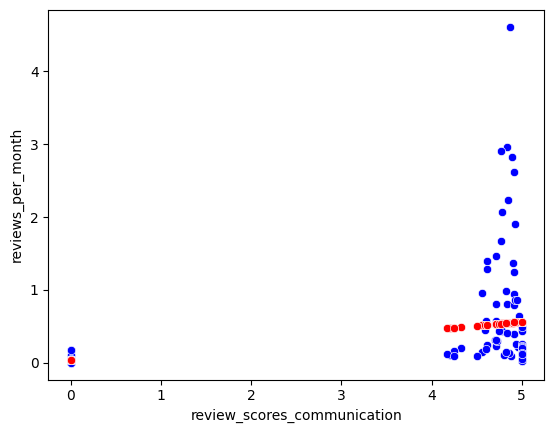

In [1182]:
#Visualizamos la gráfica comparativa entre el total real y el total predecido

sns.scatterplot(x=ind.columns[0], y=dep.columns[0], color="blue", data=data)
sns.scatterplot(x=ind.columns[0], y='Predicciones', color="red", data=data)
#sns.lineplot(x='alcohol', y='Predicciones', color="red", data=df)

In [1183]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Deter=model.score(X=Vars_Indep, y=Var_Dep)
deter.append(coef_Deter)
coef_Deter

0.09843059146391353

In [1184]:
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correl=np.sqrt(coef_Deter)
corr.append(coef_Correl)
coef_Correl

0.313736500050462

In [1185]:
dependiente.append(dep.columns[0])
independiente.append(ind.columns[0])

# TABLA DE COEFICIENTES

In [1186]:
coef= pd.DataFrame()

In [1187]:
tipo=['Entire home/apt','Entire home/apt','Entire home/apt','Entire home/apt','Entire home/apt','Entire home/apt','Hotel room','Hotel Room','Hotel Room','Hotel room','Hotel Room','Hotel Room']

In [1188]:
coef['Tipo Habitación'] = tipo
coef['dependiente'] = dependiente
coef['independiente'] = independiente
coef['Coef Determinación'] = deter
coef['Coef Correlación'] = corr

In [1189]:
coef

,Tipo Habitación,dependiente,independiente,Coef Determinación,Coef Correlación
0,Entire home/apt,host_acceptance_rate,host_response_rate,0.479756,0.692644
1,Entire home/apt,host_acceptance_rate,price,0.000555,0.023561
2,Entire home/apt,host_acceptance_rate,number_of_reviews,0.017849,0.133599
3,Entire home/apt,review_scores_location,review_scores_cleanliness,0.806106,0.897834
4,Entire home/apt,availability_365,number_of_reviews,0.002782,0.052747
5,Entire home/apt,reviews_per_month,review_scores_communication,0.140989,0.375485
6,Hotel room,host_acceptance_rate,host_response_rate,0.581784,0.762748
7,Hotel Room,host_acceptance_rate,price,0.123291,0.351128
8,Hotel Room,host_acceptance_rate,number_of_reviews,0.044381,0.210669
9,Hotel room,review_scores_location,review_scores_cleanliness,0.858691,0.926656
